In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Objective – 
Predict the probability of a customer defaulting payment for the credit card the subsequent month, based on past information. The past information is provided in the dataset. This probability will help the collections team to prioritise follow up with customers who have a high propensity of defaulting.

## About the dataset
The dataset contains the following information of 30000 customers:

DEFAULT - Default payment next month (Yes=1, No=0)

LIMIT_BAL - Amount of the given credit (INR)

SEX - Gender (1 = male; 2 = female)

EDUCATION - Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

MARRIAGE - (1 = married; 2 = single; 3 = others)

AGE - (year)

PAST_PAY - History of repayment status
- PAST_PAY1 = the repayment status in September 2005
- PAST_PAY2 = the repayment status in August 2005
- PAST_PAY6 = the repayment status in April 2005
- The measurement scale for the repayment status is i. -1 = pay duly
ii. 1 = payment delay for one month
iii. 2 = payment delay for two months
iv. 8 = payment delay for eight months
v. 9 = payment delay for nine months and above

BILL_AMT- Amount of bill statement (INR)
- BILL_AMT1 = amount of bill statement in September 2005
- BILL_AMT2 = amount of bill statement in August 2005
- BILL_AMT6 = amount of bill statement in April 2005

PAY_AMT - Amount of previous payment (INR)
- PAY_AMT1 = amount paid in September 2005
- PAY_AMT2 = amount paid in August 2005
- PAY_AMT6 = amount paid in April 2005

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab
pd.set_option("max_columns",None)
data = pd.read_csv('/content/credit_card.csv')
import warnings
warnings.filterwarnings("ignore")

In [73]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [75]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Univariate Analysis

## 1. Default(Target Variable)

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64

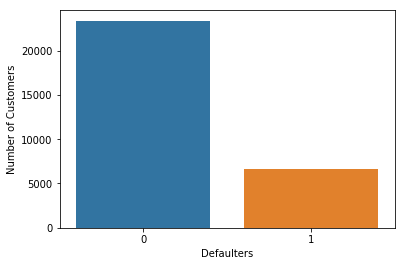

In [76]:
sns.countplot(data.DEFAULT)
plt.xlabel("Defaulters")
plt.ylabel("Number of Customers")
data.DEFAULT.value_counts("&")

## Percentage of people defaulting is 22.12%


## 2. SEX

2    0.603733
1    0.396267
Name: SEX, dtype: float64

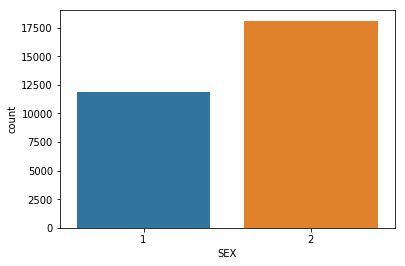

In [77]:
sns.countplot(data.SEX)
data.SEX.value_counts("%")

## 3. education
(1 = graduate school; 2 = university; 3 = high school; 4 = others)

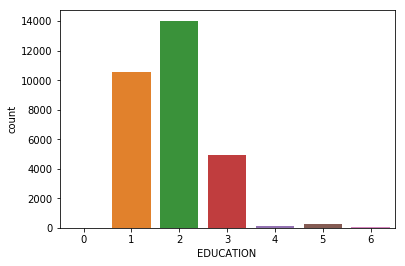

In [78]:
sns.countplot(data.EDUCATION)

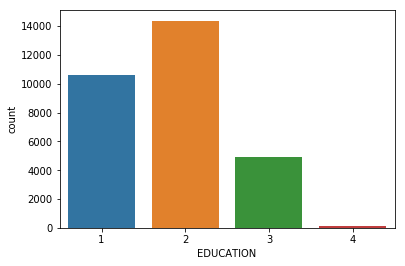

In [79]:
def edu(x):
    if x>4 or x==0:
        return(2)
    else:
        return(x)
sns.countplot(data.EDUCATION.apply(edu))

In [0]:
data.EDUCATION=data.EDUCATION.apply(edu)

## **LIMIT BALANCE**

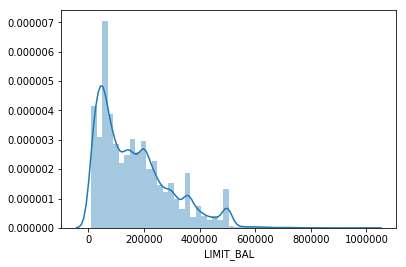

In [81]:
sns.distplot(data.LIMIT_BAL)

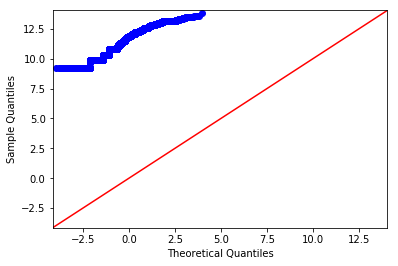

In [82]:
sm.qqplot(np.log(data.LIMIT_BAL),line='45')
pylab.show()

In [83]:
data.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [0]:
q1=50000.00
q3=240000.00
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)

In [85]:
(len(data[data.LIMIT_BAL>ul])/30000)*100

0.5566666666666666

In [0]:
#since the outliers present in the Limit bakance variable is 0.5% therefore we will cap the outliers

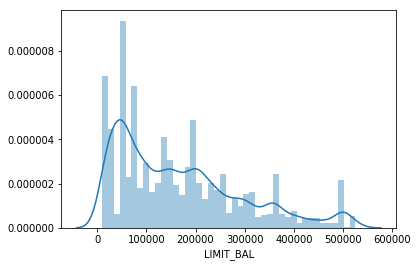

In [87]:
def limit_bal(x):
  if x>ul:
    return(ul)
  else:
    return(x)
sns.distplot(data.LIMIT_BAL.apply(limit_bal))

In [0]:
data.LIMIT_BAL=data.LIMIT_BAL.apply(limit_bal)

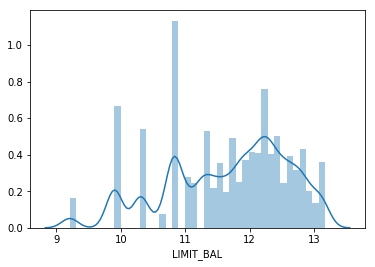

In [89]:
sns.distplot(np.log(data.LIMIT_BAL+0.01))

## Marriage
(1 = married; 2 = single; 3 = others)

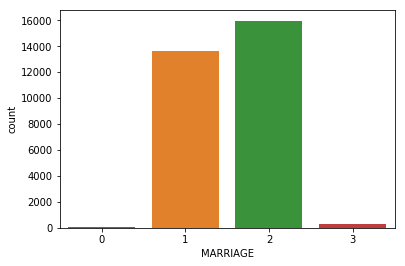

In [90]:
sns.countplot(data.MARRIAGE)

In [0]:
# replacing 0 class with the majority class
data.MARRIAGE.replace(0,2,inplace=True)

## AGE

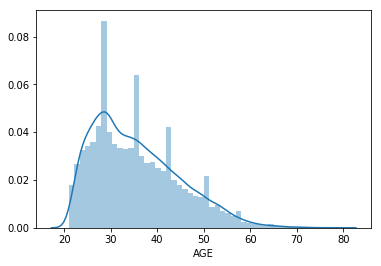

In [92]:
sns.distplot(data.AGE)

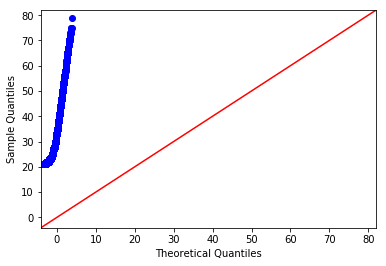

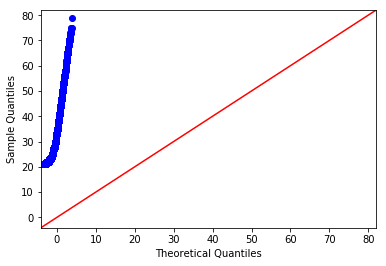

In [93]:
sm.qqplot(data.AGE,line="45")

In [94]:
#binning the age variable
data.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

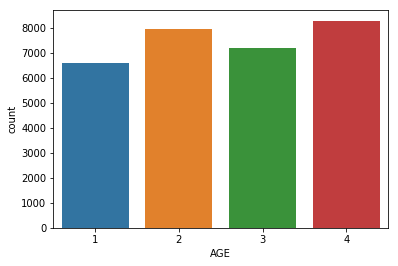

In [95]:
def age(x):
  if x<28:
    return(1)
  elif x>=28 and x<34:
    return(2)
  elif x>=34 and x<41:
    return(3)
  elif x>=41:
    return(4)
sns.countplot(data.AGE.apply(age))

In [0]:
data.AGE=data.AGE.apply(age)

## PAY_X


In [97]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [98]:
data[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',"DEFAULT"]].head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT
0,2,2,-1,-1,-2,-2,1
1,-1,2,0,0,0,2,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,-1,0,-1,0,0,0,0


In [0]:
newdata=data[(data.PAY_1==-1) & (data.PAY_2==-1)&(data.PAY_3==-1)&
     (data.PAY_4==-1)&(data.PAY_5==-1)&(data.PAY_6==-1) & (data.DEFAULT==1)]

In [0]:
newdata=data[(data.PAY_1==-1) & (data.PAY_2==-1)&(data.PAY_3==-1)&
     (data.PAY_4==-1)&(data.PAY_5==-1)&(data.PAY_6==-1) & (data.DEFAULT==1)]
def default(x):
    ind=x[0]
    default=x[1]
    if ind in newdata.ID.values:
        return(0)
    else:
        return(default)
# Changing the label of the misclassified records to 0
data['DEFAULT']=data[['ID',"DEFAULT"]].apply(default,axis=1)

In [101]:
data.DEFAULT.value_counts("%")

0    0.788267
1    0.211733
Name: DEFAULT, dtype: float64

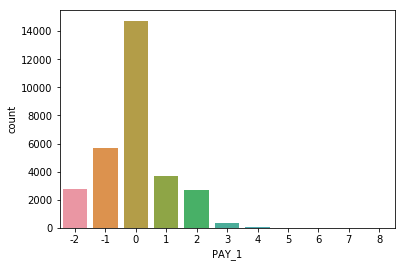

In [102]:
sns.countplot(data.PAY_1)

In [0]:
for i in ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  data[i].replace(-2,0,inplace=True)
  data[i].replace(-1,0,inplace=True)

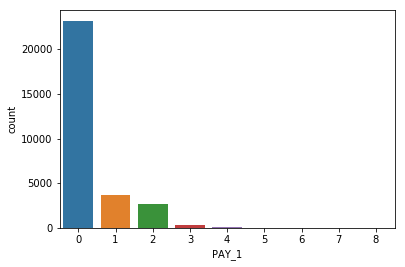

In [104]:
sns.countplot(data.PAY_1)

In [105]:
pd.crosstab(data.PAY_1,data.DEFAULT)

DEFAULT,0,1
PAY_1,,
0,20259,2923
1,2436,1252
2,823,1844
3,78,244
4,24,52
5,13,13
6,5,6
7,2,7
8,8,11


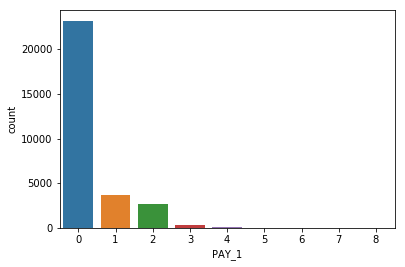

In [106]:
sns.countplot(data.PAY_1)

## Bill Amount

In [107]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

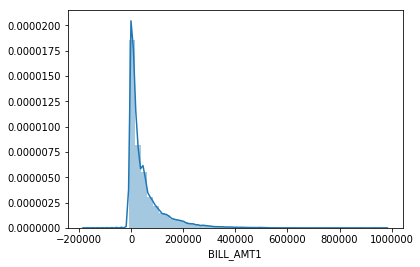

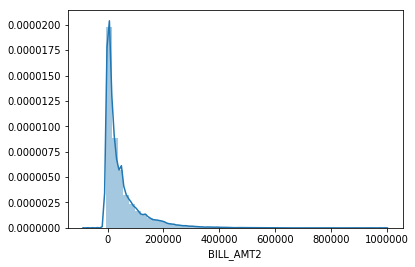

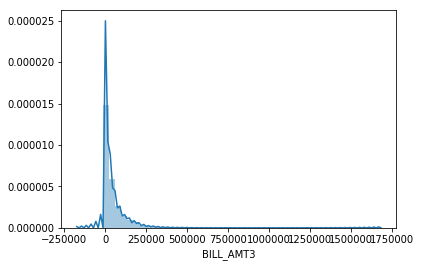

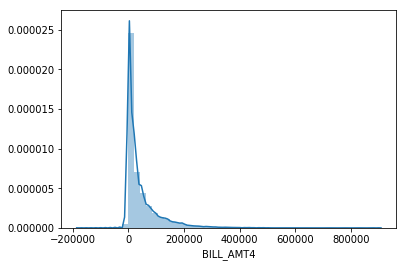

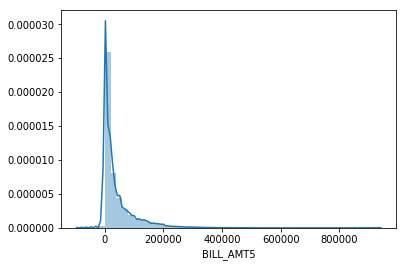

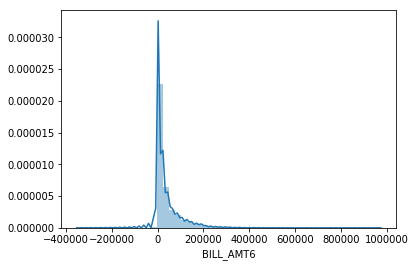

In [108]:
for i in ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
  sns.distplot(data[i])
  plt.show()

In [109]:
data.BILL_AMT1.describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

In [0]:
# treating the outliers
def bill_amt(x):
  if x>ul:
    return(ul)
  elif x<ll:
    return(ll)
  else:
    return(x)
for i in ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
  q1=data[i].quantile(0.25)
  q3=data[i].quantile(0.75)
  iqr=q3-q1
  ul=q3+(1.5*iqr)
  ll=q1-(1.5*iqr)
  data[i]=data[i].apply(bill_amt)

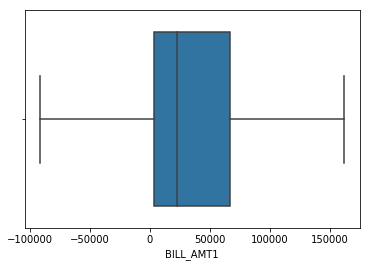

In [111]:
sns.boxplot(data.BILL_AMT1)

## PAY_AMT

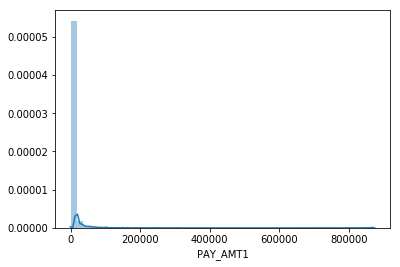

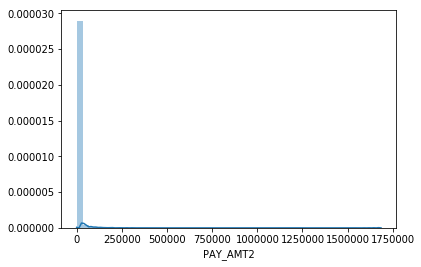

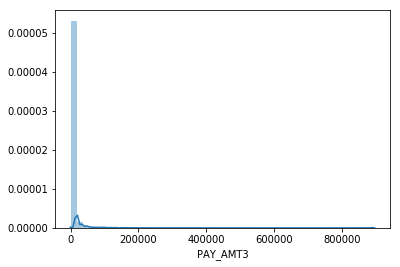

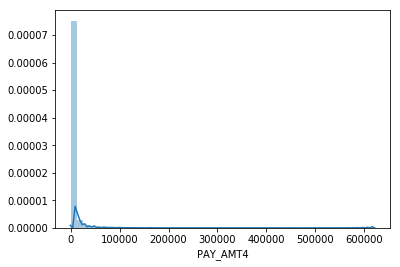

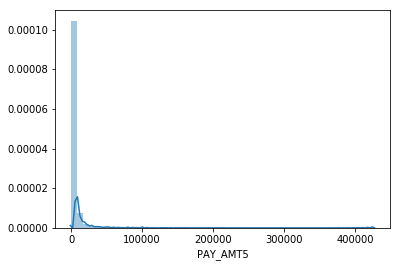

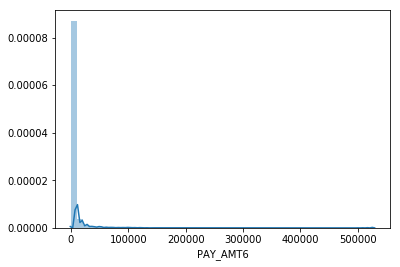

In [112]:
for i in ['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']:
  sns.distplot(data[i])
  plt.show()

In [113]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [0]:
#treating the outliers
def pay_amt(x):
  if x>ul:
    return(ul)
  elif x<ll:
    return(ll)
  else:
    return(x)
for i in ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']:
  q1=data[i].quantile(0.25)
  q3=data[i].quantile(0.75)
  iqr=q3-q1
  ul=q3+(1.5*iqr)
  ll=q1-(1.5*iqr)
  data[i]=data[i].apply(pay_amt)
  

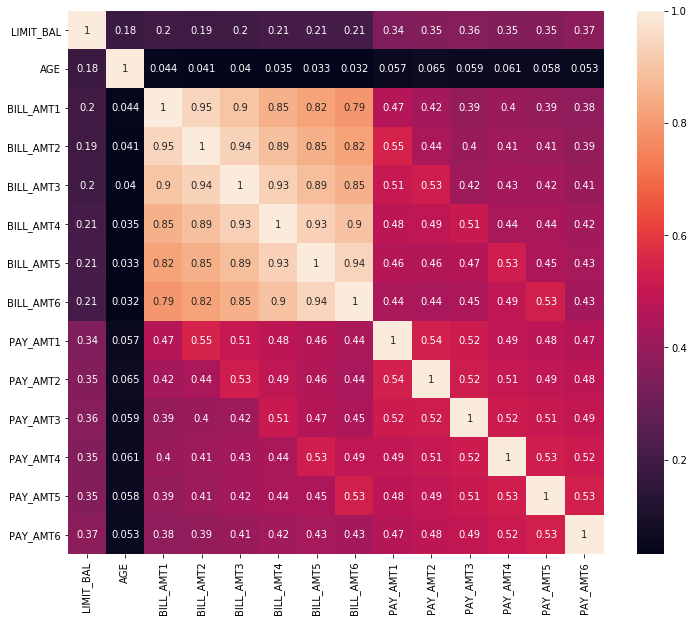

In [115]:
continuous=['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 
            'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(12,10))
sns.heatmap(data[continuous].corr(),annot=True)

## Report after univariate analysis of the variables:

1.Majority of customers are non-defaulters.

2.Majority of customers are females.

3.More than 80% of the customers have either university or graduate school level of education.

4.53.31% of the customers are single

5.Presence of outliers in pay_amount, limit_balance, bill_amount.

6.Undefined labels in repayment_staus, education, marriage

## 2. Categorical Variables
### To find the relationship between the categorical variables we can go for chi squared test,
### taking alpha=0.05
### Ho= No relationship between the variables
### Ha= Dependency

In [116]:
from scipy.stats import chi2_contingency
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [0]:
categorical=['SEX', 'EDUCATION', 'MARRIAGE','PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','DEFAULT']

In [0]:
c1=[]
c2=[]
p_value=[]
for i in categorical:
    for j in categorical:
        if i!=j:
            stats,p,dof,expected=chi2_contingency(pd.crosstab(data[i],data[j]))
            c1.append(i)
            c2.append(j)
            p_value.append(p)
pval=pd.DataFrame({'Variable_1':c1,"Variable_2":c2,"P_value":p_value})

In [119]:
pval

,Variable_1,Variable_2,P_value
0,SEX,EDUCATION,2.448281e-05
1,SEX,MARRIAGE,8.893830e-07
2,SEX,PAY_1,1.108675e-07
3,SEX,PAY_2,9.658601e-12
4,SEX,PAY_3,3.728432e-11
5,SEX,PAY_4,1.161336e-10
6,SEX,PAY_5,1.668962e-09
7,SEX,PAY_6,2.597840e-06
8,SEX,DEFAULT,1.333994e-12
9,EDUCATION,SEX,2.448281e-05


## Report:
1.There is multicollinearity present among the bill_amount variables.

2.The categorical variables also show association with each other based on the chi-squared test.

## Bi-variate analysis (with the target variable)

## 1. limit_bal vs default

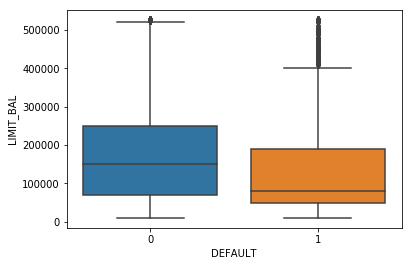

In [120]:
sns.boxplot(data.DEFAULT,data.LIMIT_BAL)

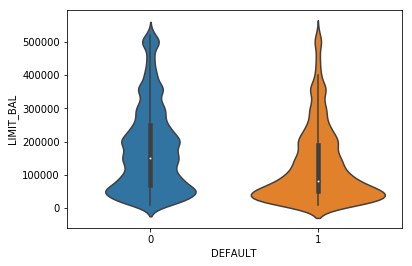

In [121]:
sns.violinplot(data.DEFAULT,data.LIMIT_BAL)

## 2. age vs default

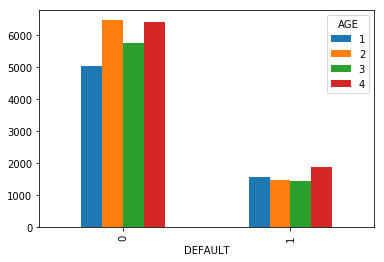

In [122]:
pd.crosstab(data.DEFAULT,data.AGE).plot(kind='bar')

## 3. sex vs default

2    0.603733
1    0.396267
Name: SEX, dtype: float64


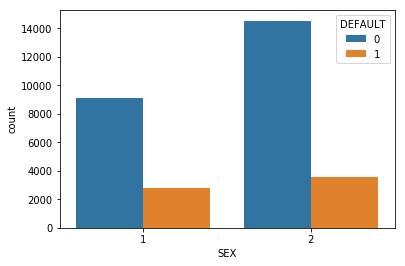

In [123]:
sns.countplot(data.SEX,hue=data.DEFAULT)
print(data.SEX.value_counts("%"))

In [124]:
data.groupby('SEX')['DEFAULT'].value_counts("%")

SEX  DEFAULT
1    0          0.767581
     1          0.232419
2    0          0.801844
     1          0.198156
Name: DEFAULT, dtype: float64

## Repayment status

PAY_1        0     1     2    3   4   5  6  7   8
DEFAULT                                          
0        20259  2436   823   78  24  13  5  2   8
1         2923  1252  1844  244  52  13  6  7  11
PAY_2        0   1     2    3   4   5  6   7  8
DEFAULT                                        
0        21686  23  1743  125  49  10  3   8  1
1         3876   5  2184  201  50  15  9  12  0
PAY_3        0  1     2    3   4   5   6   7  8
DEFAULT                                        
0        21637  3  1850  102  32   9   9   5  1
1         4150  1  1969  138  44  12  14  22  2
PAY_4        0  1     2    3   4   5  6   7  8
DEFAULT                                       
0        22017  1  1506   70  23  17  3  10  1
1         4473  1  1653  110  46  18  2  48  1
PAY_5        0     2    3   4   5  6   7  8
DEFAULT                                    
0        22329  1203   65  33   7  1  10  0
1         4703  1423  113  51  10  3  48  1
PAY_6        0     2    3   4  5   6   7  8
DEFAULT 

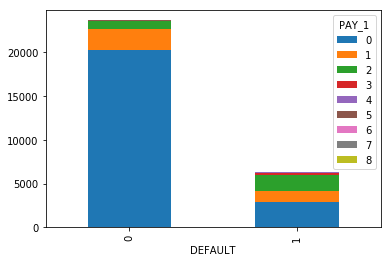

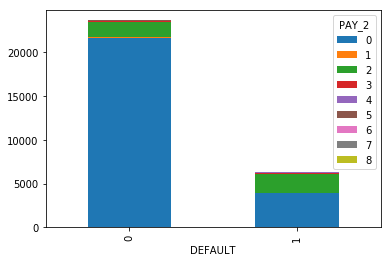

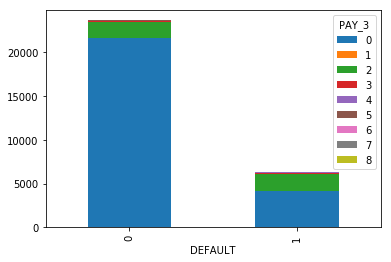

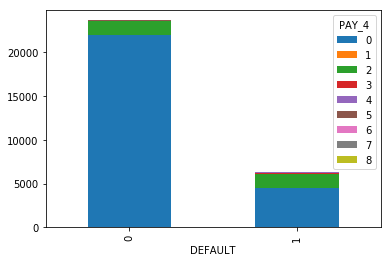

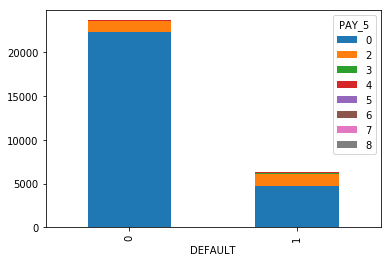

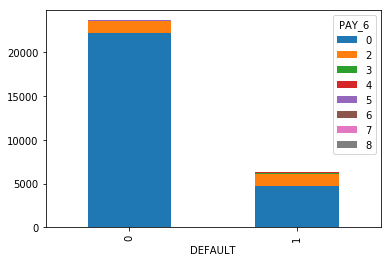

In [125]:
for i in ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  pd.crosstab(data.DEFAULT,data[i]).plot.bar(stacked=True)
  print(pd.crosstab(data.DEFAULT,data[i]))

In [0]:
for i in ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  data[i].replace(-2,0,inplace=True)
  data[i].replace(-1,0,inplace=True)

In [0]:
def pay_x(x):
  if x>1:
    return(1)
  else:
    return(x)
for i in ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  data[i]=data[i].apply(pay_x)

## Customers with payment delay of 2 or more than 2 months have a higher percentage of defaulting

In [129]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,1,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,1,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,3,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,3,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,4,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0


In [130]:
data.shape

(30000, 25)

In [0]:
X=data.drop(["ID","DEFAULT"],axis=1)
y=data.DEFAULT

## Scaling the data set

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [0]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.148083,0.810161,0.255476,-1.072064,-1.412805,1.843941,2.399959,-0.404199,-0.364009,-0.331354,-0.338189,-0.787236,-0.797557,-0.844489,-0.854980,-0.846067,-0.827978,-1.001158,-0.773703,-0.904708,-0.884502,-0.882842,-0.866920
1,-0.366901,0.810161,0.255476,0.857960,-1.412805,-0.542317,2.399959,-0.404199,-0.364009,-0.331354,2.956928,-0.811235,-0.825508,-0.801811,-0.778444,-0.759465,-0.745143,-1.001158,-0.685670,-0.606697,-0.559114,-0.882842,-0.228173
2,-0.601256,0.810161,0.255476,0.857960,0.385572,-0.542317,-0.416674,-0.404199,-0.364009,-0.331354,-0.338189,-0.293494,-0.575803,-0.568893,-0.519758,-0.471387,-0.433004,-0.566536,-0.544137,-0.606697,-0.559114,-0.559640,0.729948
3,-0.913728,0.810161,0.255476,-1.072064,0.385572,-0.542317,-0.416674,-0.404199,-0.364009,-0.331354,-0.338189,0.052570,0.118508,0.196266,-0.192677,-0.120193,-0.077427,-0.428533,-0.397227,-0.547095,-0.526575,-0.537339,-0.547546
4,-0.913728,-1.234323,0.255476,-1.072064,1.284761,-0.542317,-0.416674,-0.404199,-0.364009,-0.331354,-0.338189,-0.695529,-0.745432,-0.091878,-0.365165,-0.366162,-0.342014,-0.428533,2.215885,2.075405,2.043994,-0.660155,-0.650065


## Model Building

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier
#evaluation metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,classification_report,roc_auc_score
#Building models on imbalanced class
lr=LogisticRegression(penalty='l1')
rf=RandomForestClassifier(n_estimators=350)
dt=DecisionTreeClassifier(criterion='entropy')
ada=AdaBoostClassifier(base_estimator=dt,n_estimators=200)
bc=BaggingClassifier(base_estimator=dt,n_estimators=200)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

## Base model

In [136]:
#lr
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
for train, test in skf.split(X, y):  
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model_lr=lr.fit(X_train,y_train)
    pred_lr=model_lr.predict(X_test)
    print("Train Accuracy:",model_lr.score(X_train,y_train))
    print("Test Accuracy:",model_lr.score(X_test,y_test))
    print(classification_report(pred_lr,y_test))
    print("ROC-AUC: ",roc_auc_score(pred_lr,y_test))

Train Accuracy: 0.8186591107962832
Test Accuracy: 0.8103649391768039
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5380
           1       0.30      0.61      0.40       621

    accuracy                           0.81      6001
   macro avg       0.62      0.72      0.64      6001
weighted avg       0.88      0.81      0.84      6001

ROC-AUC:  0.7204571712491544
Train Accuracy: 0.8186591107962832
Test Accuracy: 0.8116980503249458
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5358
           1       0.31      0.61      0.41       643

    accuracy                           0.81      6001
   macro avg       0.63      0.72      0.65      6001
weighted avg       0.88      0.81      0.84      6001

ROC-AUC:  0.7227942751554775
Train Accuracy: 0.818125
Test Accuracy: 0.8138333333333333
              precision    recall  f1-score   support

           0       0.94      0.84   

In [137]:
#naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model_gnb=gnb.fit(X_train,y_train)
pred_gnb=model_gnb.predict(X_test)
print("Train Accuracy:",model_gnb.score(X_train,y_train))
print("Test Accuracy:",model_gnb.score(X_test,y_test))
print(classification_report(pred_gnb,y_test))

Train Accuracy: 0.7784675638515062
Test Accuracy: 0.796799466577763
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4780
           1       0.50      0.52      0.51      1219

    accuracy                           0.80      5999
   macro avg       0.69      0.69      0.69      5999
weighted avg       0.80      0.80      0.80      5999



In [138]:
#Random Forest
skf = StratifiedKFold(n_splits=2)
for train, test in skf.split(X, y):  
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model_rf=rf.fit(X_train,y_train)
    pred_rf=model_rf.predict(X_test)
    print("F1",f1_score(y_test,pred_rf))
    print("Precision",precision_score(y_test,pred_rf))
    print("Recall",recall_score(y_test,pred_rf))
    print("Train Accuracy:",model_rf.score(X_train,y_train))
    print("Test Accuracy:",model_rf.score(X_test,y_test))
# overfitting 

F1 0.46018376722817766
Precision 0.5869140625
Recall 0.378463476070529
Train Accuracy: 0.9984666666666666
Test Accuracy: 0.812
F1 0.45941070354780517
Precision 0.6321014892443464
Recall 0.3608312342569269
Train Accuracy: 0.9972
Test Accuracy: 0.8202


In [0]:
cols=pd.DataFrame({"Features":model_rf.feature_importances_,"Col":X.columns})

In [140]:
cols.sort_values(by="Features",ascending=False)

,Features,Col
0,0.074718,LIMIT_BAL
11,0.070386,BILL_AMT1
5,0.069230,PAY_1
12,0.061336,BILL_AMT2
17,0.059033,PAY_AMT1
13,0.057522,BILL_AMT3
14,0.056473,BILL_AMT4
16,0.054553,BILL_AMT6
15,0.054250,BILL_AMT5
18,0.053651,PAY_AMT2


## Applying PCA

In [141]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [0]:
cont=['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
from sklearn.decomposition import PCA
pca=PCA()
pca_X = pca.fit_transform(X[cont])
pca_X=pd.DataFrame(pca_X,columns=cont)

In [143]:
sum(np.cumsum(pca.explained_variance_ratio_)<=0.95)

8

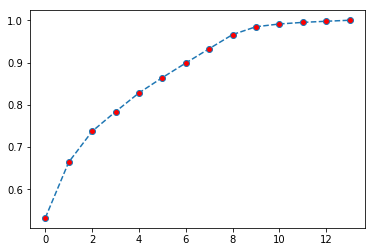

In [144]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_),"-o",markerfacecolor='red',linestyle='dashed')

In [0]:
# Deploy PCA with 8 components
pca=PCA(n_components=8)
pca_X=pca.fit_transform(X[cont])

In [0]:
pca_X=pd.DataFrame(pca_X,columns=[1,2,3,4,5,6,7,8])

In [0]:
pca_X=pd.concat([pca_X,data[['SEX', 'EDUCATION', 'MARRIAGE','PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]],axis=1)

## XG Boost on pca components

In [0]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimatore=500)
for train, test in skf.split(pca_X, y):  
    X_train, X_test = pca_X.iloc[train], pca_X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model_xgb=xgb.fit(X_train,y_train)
    pred_xgb=model_xgb.predict(X_test)
    print("Train Accuracy:",model_xgb.score(X_train,y_train))
    print("Test Accuracy:",model_xgb.score(X_test,y_test))
    print(classification_report(pred_xgb,y_test))

Train Accuracy: 0.8347333333333333
Test Accuracy: 0.8138
              precision    recall  f1-score   support

           0       0.94      0.84      0.89     13135
           1       0.35      0.60      0.45      1865

    accuracy                           0.81     15000
   macro avg       0.65      0.72      0.67     15000
weighted avg       0.86      0.81      0.83     15000

Train Accuracy: 0.822
Test Accuracy: 0.822
              precision    recall  f1-score   support

           0       0.96      0.84      0.89     13430
           1       0.33      0.66      0.44      1570

    accuracy                           0.82     15000
   macro avg       0.64      0.75      0.67     15000
weighted avg       0.89      0.82      0.85     15000



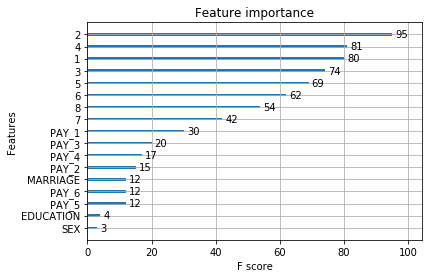

In [0]:
# feature importance
from xgboost import plot_importance
plot_importance(model_xgb)
plt.show()

## Naive bayes on PCA components

In [0]:
#naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
for train, test in skf.split(pca_X, y):  
    X_train, X_test = pca_X.iloc[train], pca_X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model_gnb=gnb.fit(X_train,y_train)
    pred_gnb=model_gnb.predict(X_test)
    print("Train Accuracy:",model_gnb.score(X_train,y_train))
    print("Test Accuracy:",model_gnb.score(X_test,y_test))
    print(classification_report(pred_gnb,y_test))

Train Accuracy: 0.7926666666666666
Test Accuracy: 0.7727333333333334
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     11701
           1       0.48      0.46      0.47      3299

    accuracy                           0.77     15000
   macro avg       0.67      0.66      0.66     15000
weighted avg       0.77      0.77      0.77     15000

Train Accuracy: 0.7794666666666666
Test Accuracy: 0.7928666666666667
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     11787
           1       0.52      0.51      0.51      3213

    accuracy                           0.79     15000
   macro avg       0.69      0.69      0.69     15000
weighted avg       0.79      0.79      0.79     15000



In [0]:
#rf
for train, test in skf.split(pca_X, y):  
    X_train, X_test = pca_X.iloc[train], pca_X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model_rf=rf.fit(X_train,y_train)
    pred_rf=model_rf.predict(X_test)
    print("Train Accuracy:",model_rf.score(X_train,y_train))
    print("Test Accuracy:",model_rf.score(X_test,y_test))

Train Accuracy: 0.9977998899944998
Test Accuracy: 0.8136186381361864
Train Accuracy: 0.9973
Test Accuracy: 0.8187
Train Accuracy: 0.9971501424928754
Test Accuracy: 0.8215821582158216


## Resampling the target variable

In [0]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
smote=SMOTE(ratio=0.4,sampling_strategy='minority')

## Logistic Regression

In [0]:
smote=SMOTE(ratio=0.5,sampling_strategy='minority')
#lr model
X_resampled, y_resampled = smote.fit_sample(pca_X, y)
skf = StratifiedKFold(n_splits=5)
for train, test in skf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled[train], X_resampled[test]
    y_train, y_test = y_resampled[train], y_resampled[test]
    model_lr=lr.fit(X_train,y_train)
    pred_lr=model_lr.predict(X_test)
    print("Train Accuracy:",model_lr.score(X_train,y_train))
    print("Test Accuracy:",model_lr.score(X_test,y_test))
    print(classification_report(pred_lr,y_test))

Train Accuracy: 0.7616379462240547
Test Accuracy: 0.7517970401691332
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      5413
           1       0.48      0.68      0.56      1682

    accuracy                           0.75      7095
   macro avg       0.68      0.73      0.70      7095
weighted avg       0.79      0.75      0.76      7095

Train Accuracy: 0.7571624907495507
Test Accuracy: 0.7643410852713178
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      5184
           1       0.55      0.68      0.61      1911

    accuracy                           0.76      7095
   macro avg       0.71      0.74      0.72      7095
weighted avg       0.78      0.76      0.77      7095

Train Accuracy: 0.7635056559890052
Test Accuracy: 0.7478505990133897
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      5357
           1       0.49      0

## Naive Bayes

In [0]:
#nb 
for train, test in skf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled[train], X_resampled[test]
    y_train, y_test = y_resampled[train], y_resampled[test]
    model_gnb=gnb.fit(X_train,y_train)
    pred_gnb=model_gnb.predict(X_test)
    print("Train Accuracy:",model_gnb.score(X_train,y_train))
    print("Test Accuracy:",model_gnb.score(X_test,y_test))
    print(classification_report(pred_gnb,y_test))

Train Accuracy: 0.7324946259294499
Test Accuracy: 0.7267089499647639
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      5177
           1       0.50      0.61      0.55      1918

    accuracy                           0.73      7095
   macro avg       0.67      0.69      0.68      7095
weighted avg       0.75      0.73      0.73      7095

Train Accuracy: 0.7278782112274025
Test Accuracy: 0.7441860465116279
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      5009
           1       0.56      0.63      0.59      2086

    accuracy                           0.74      7095
   macro avg       0.70      0.71      0.70      7095
weighted avg       0.76      0.74      0.75      7095

Train Accuracy: 0.7345032949219438
Test Accuracy: 0.7130373502466526
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      5126
           1       0.49      0

## XG Boost

In [0]:
for train, test in skf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled[train], X_resampled[test]
    y_train, y_test = y_resampled[train], y_resampled[test]
    model_xgb=xgb.fit(X_train,y_train)
    pred_xgb=model_xgb.predict(X_test)
    print("Train Accuracy:",model_xgb.score(X_train,y_train))
    print("Test Accuracy:",model_xgb.score(X_test,y_test))
    print(classification_report(pred_xgb,y_test))

Train Accuracy: 0.8149205342354724
Test Accuracy: 0.7525017618040873
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      5624
           1       0.44      0.71      0.54      1471

    accuracy                           0.75      7095
   macro avg       0.67      0.74      0.69      7095
weighted avg       0.81      0.75      0.77      7095

Train Accuracy: 0.8109736758642563
Test Accuracy: 0.7661733615221987
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      5407
           1       0.51      0.71      0.59      1688

    accuracy                           0.77      7095
   macro avg       0.70      0.75      0.71      7095
weighted avg       0.80      0.77      0.78      7095

Train Accuracy: 0.8087888078373331
Test Accuracy: 0.773784355179704
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      5373
           1       0.52      0.

## RF MODEL

In [0]:
for train, test in skf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled[train], X_resampled[test]
    y_train, y_test = y_resampled[train], y_resampled[test]
    model_rf=rf.fit(X_train,y_train)
    pred_rf=model_rf.predict(X_test)
    print("Train Accuracy:",model_rf.score(X_train,y_train))
    print("Test Accuracy:",model_rf.score(X_test,y_test))
    print(classification_report(pred_rf,y_test))

Train Accuracy: 0.9984494484970222
Test Accuracy: 0.7873150105708245
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      5453
           1       0.53      0.76      0.62      1642

    accuracy                           0.79      7095
   macro avg       0.72      0.78      0.74      7095
weighted avg       0.83      0.79      0.80      7095

Train Accuracy: 0.9980970504281637
Test Accuracy: 0.7923890063424948
              precision    recall  f1-score   support

           0       0.91      0.81      0.85      5321
           1       0.56      0.75      0.64      1774

    accuracy                           0.79      7095
   macro avg       0.74      0.78      0.75      7095
weighted avg       0.82      0.79      0.80      7095

Train Accuracy: 0.9977446523593051
Test Accuracy: 0.7966173361522199
              precision    recall  f1-score   support

           0       0.90      0.81      0.86      5227
           1       0.59      0